In [61]:
pip install numpy pandas statsmodels seaborn matplotlib scikit-learn lightgbm

In [62]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 

In [63]:
#j'ai converti la data csv en excel
df = pd.read_excel(r"C:\Users\azeddine\documents\diabetes.xlsx")

In [64]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## statistique déscriptive

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [67]:
#calcule la distribution des valeurs dans la colonne "Outcome" de votre DataFrame df en pourcentage. 
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

Pour la valeur 0 (non diabétique) : 65.10% des individus dans votre ensemble de données ont cette valeur dans la colonne "Outcome".

Pour la valeur 1 (diabétique) : 34.90% des individus dans votre ensemble de données ont cette valeur dans la colonne "Outcome".

Cela signifie que la majorité des individus dans votre ensemble de données ne sont pas diabétiques (65.10%), tandis qu'une proportion plus petite (34.90%) sont diabétiques.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

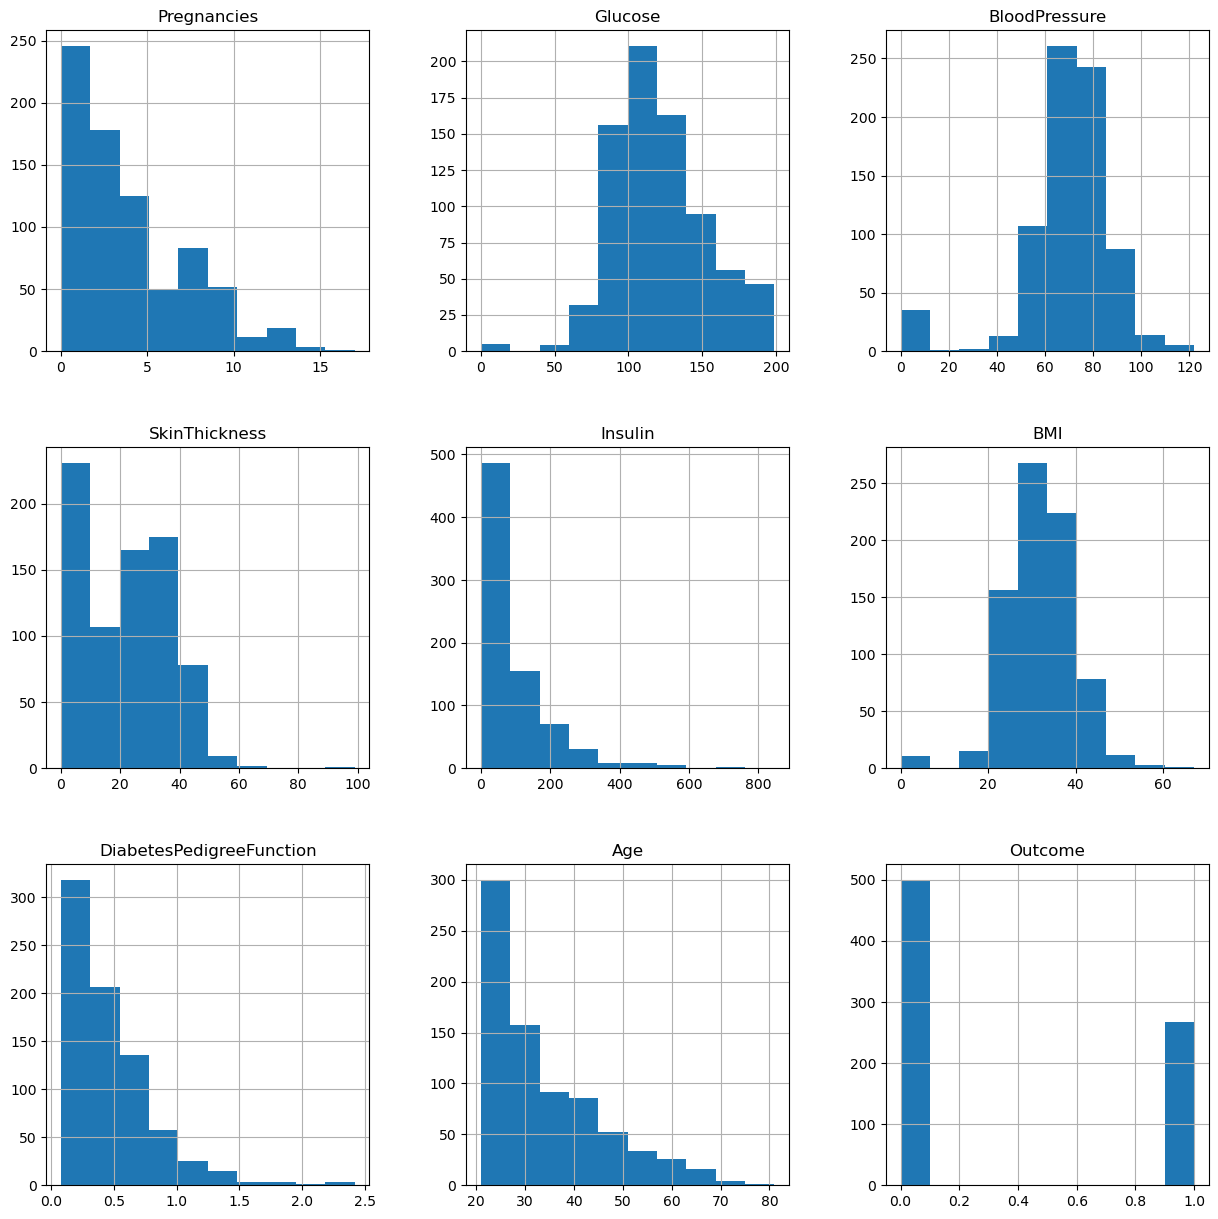

In [68]:
df.hist(figsize = (15,15))

# Correlation


In [69]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


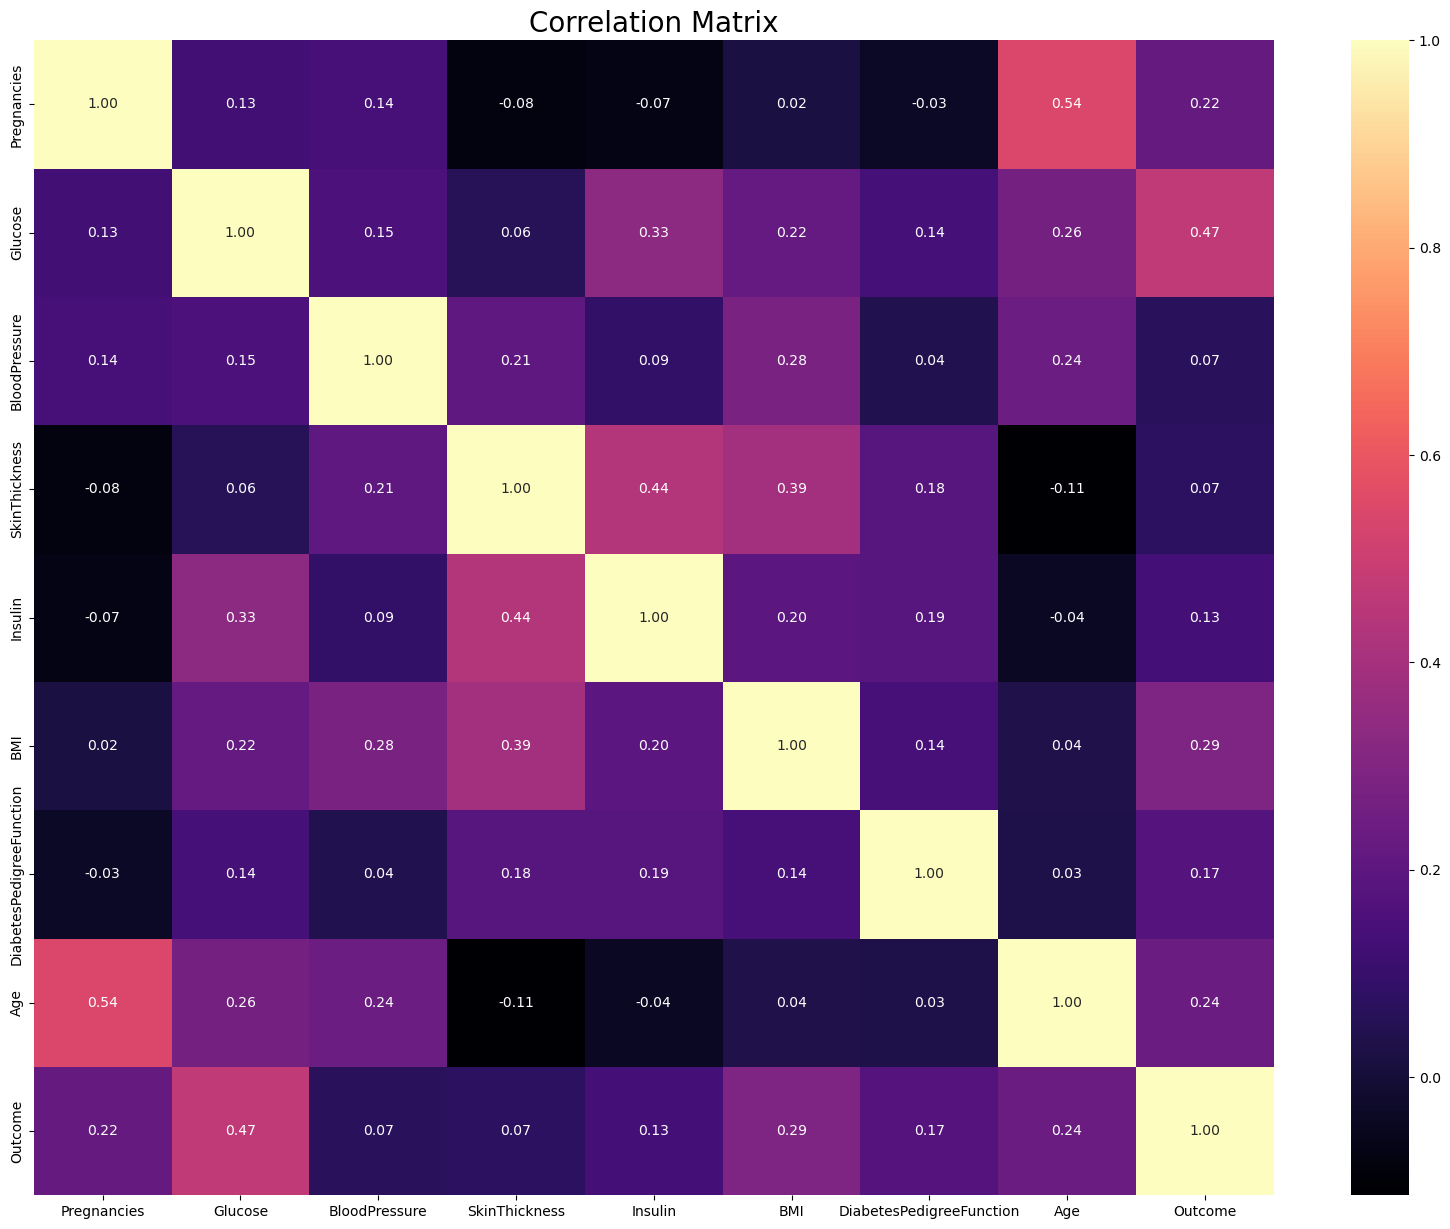

In [70]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Prétraitement des données
 Analyse des observations manquantes

In [71]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [72]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [73]:
#pour voir les données manquantes
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [74]:
# cette fonction permet de calculer la médiane d'une variable spécifique, regroupée par la variable cible, 
#en éliminant les valeurs manquantes de la variable spécifique.
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [75]:
#ce code remplit les valeurs manquantes dans chaque colonne de caractéristiques (columns) en utilisant la médiane 
#des valeurs de cette colonne, différenciée en fonction du statut diabétique ou non diabétique de l'individu
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [76]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# KNN

In [77]:

X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

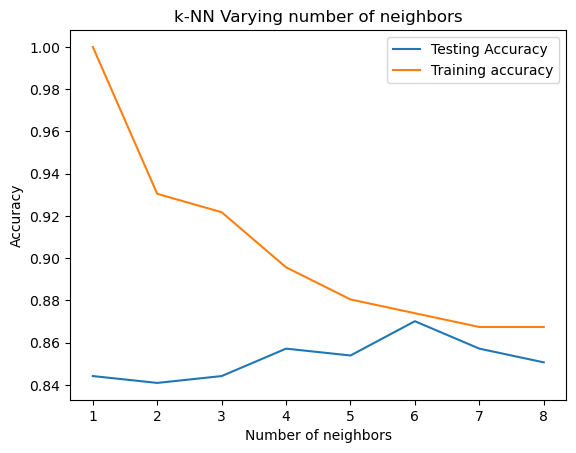

In [81]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [82]:
knn = KNeighborsClassifier(n_neighbors=6)

In [83]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [84]:
knn.score(X_test,y_test)

0.8701298701298701

In [85]:
from sklearn.metrics import confusion_matrix


In [86]:
y_pred = knn.predict(X_test)

In [87]:
confusion_matrix(y_test,y_pred)

array([[184,  17],
       [ 23,  84]], dtype=int64)

In [88]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,All
True,,,
0,184,17,201
1,23,84,107
All,207,101,308


In [89]:
from sklearn.metrics import classification_report

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       107
           1       0.74      0.89      0.81        47

    accuracy                           0.87       154
   macro avg       0.84      0.88      0.85       154
weighted avg       0.88      0.87      0.87       154



ces mesures donnent une vue d'ensemble des performances du modèle pour chaque classe individuelle ainsi que pour l'ensemble du jeu de données. Dans votre cas, le modèle semble avoir de bonnes performances globales
avec une précision moyenne de 86% et une exactitude de 87%.

# Naive Bayes

In [91]:
import numpy as np
from sklearn import model_selection

array = df.values  # Convertir le DataFrame en un tableau NumPy
X = array[:, 0:8]  # Sélectionner toutes les lignes et les colonnes de la première à la huitième (0-7)
Y = array[:, 8]    # Sélectionner toutes les lignes et la neuvième colonne (8)
test_size = 0.15   # Prendre 15% pour l'ensemble de test
seed = 7           # Numéro de graine aléatoire pour la reproductibilité du code

# Division des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [92]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Création du modèle Naive Bayes
model = GaussianNB()

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, Y_train)

# Affichage du modèle
print(model)

# Prédiction sur les données de test
expected = Y_test
predicted = model.predict(X_test)

# Résumé de l'ajustement du modèle
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84        72
         1.0       0.74      0.73      0.74        44

    accuracy                           0.80       116
   macro avg       0.79      0.79      0.79       116
weighted avg       0.80      0.80      0.80       116

[[61 11]
 [12 32]]


In [93]:
#L'exactitude (accuracy) du modèle est de 0.80, ce qui signifie que 80% des prédictions du modèle sont correctes.
#Cela représente le rapport entre le nombre total de prédictions correctes et le nombre total 
#d'instances dans les données de test.

# LogisticRegression

In [94]:
from sklearn.linear_model import LogisticRegression

# Création d'une instance de modèle de régression logistique
logreg = LogisticRegression()

# Entraînement du modèle sur les données d'entraînement
logreg.fit(X_train, Y_train)

# Prédiction sur les données de test
y_pred = logreg.predict(X_test)

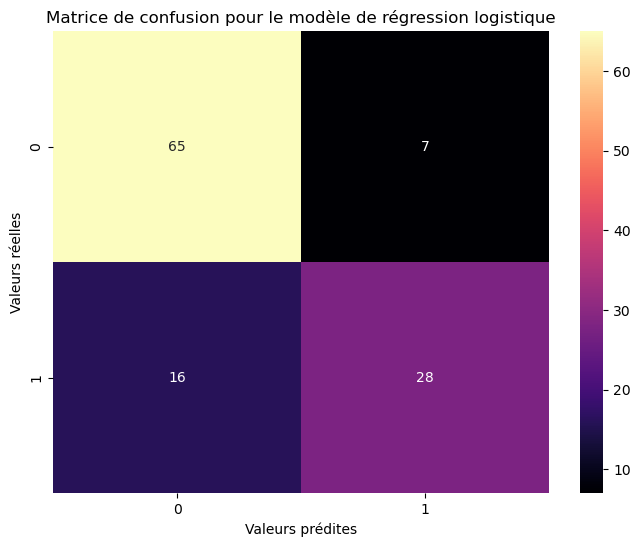

In [96]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
confmat = confusion_matrix(Y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confmat, annot=True, fmt='d', cmap="magma")
plt.title("Matrice de confusion pour le modèle de régression logistique")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.show()


In [97]:
accuracy = accuracy_score(y_pred, Y_test)
print("Exactitude du modèle :", accuracy)

Exactitude du modèle : 0.8017241379310345


# RandomForest 

In [98]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

In [99]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [100]:
random_forest = RandomForestClassifier().fit(X_train,y_train)

In [101]:
feature_importances =pd.DataFrame({"Features":X_train.columns,
              "Feature Imporances": random_forest.feature_importances_}).sort_values(by="Feature Imporances")

In [102]:
feature_importances.head()

,Features,Feature Imporances
2,BloodPressure,0.051766
0,Pregnancies,0.052432
6,DiabetesPedigreeFunction,0.066686
7,Age,0.069588
5,BMI,0.102414


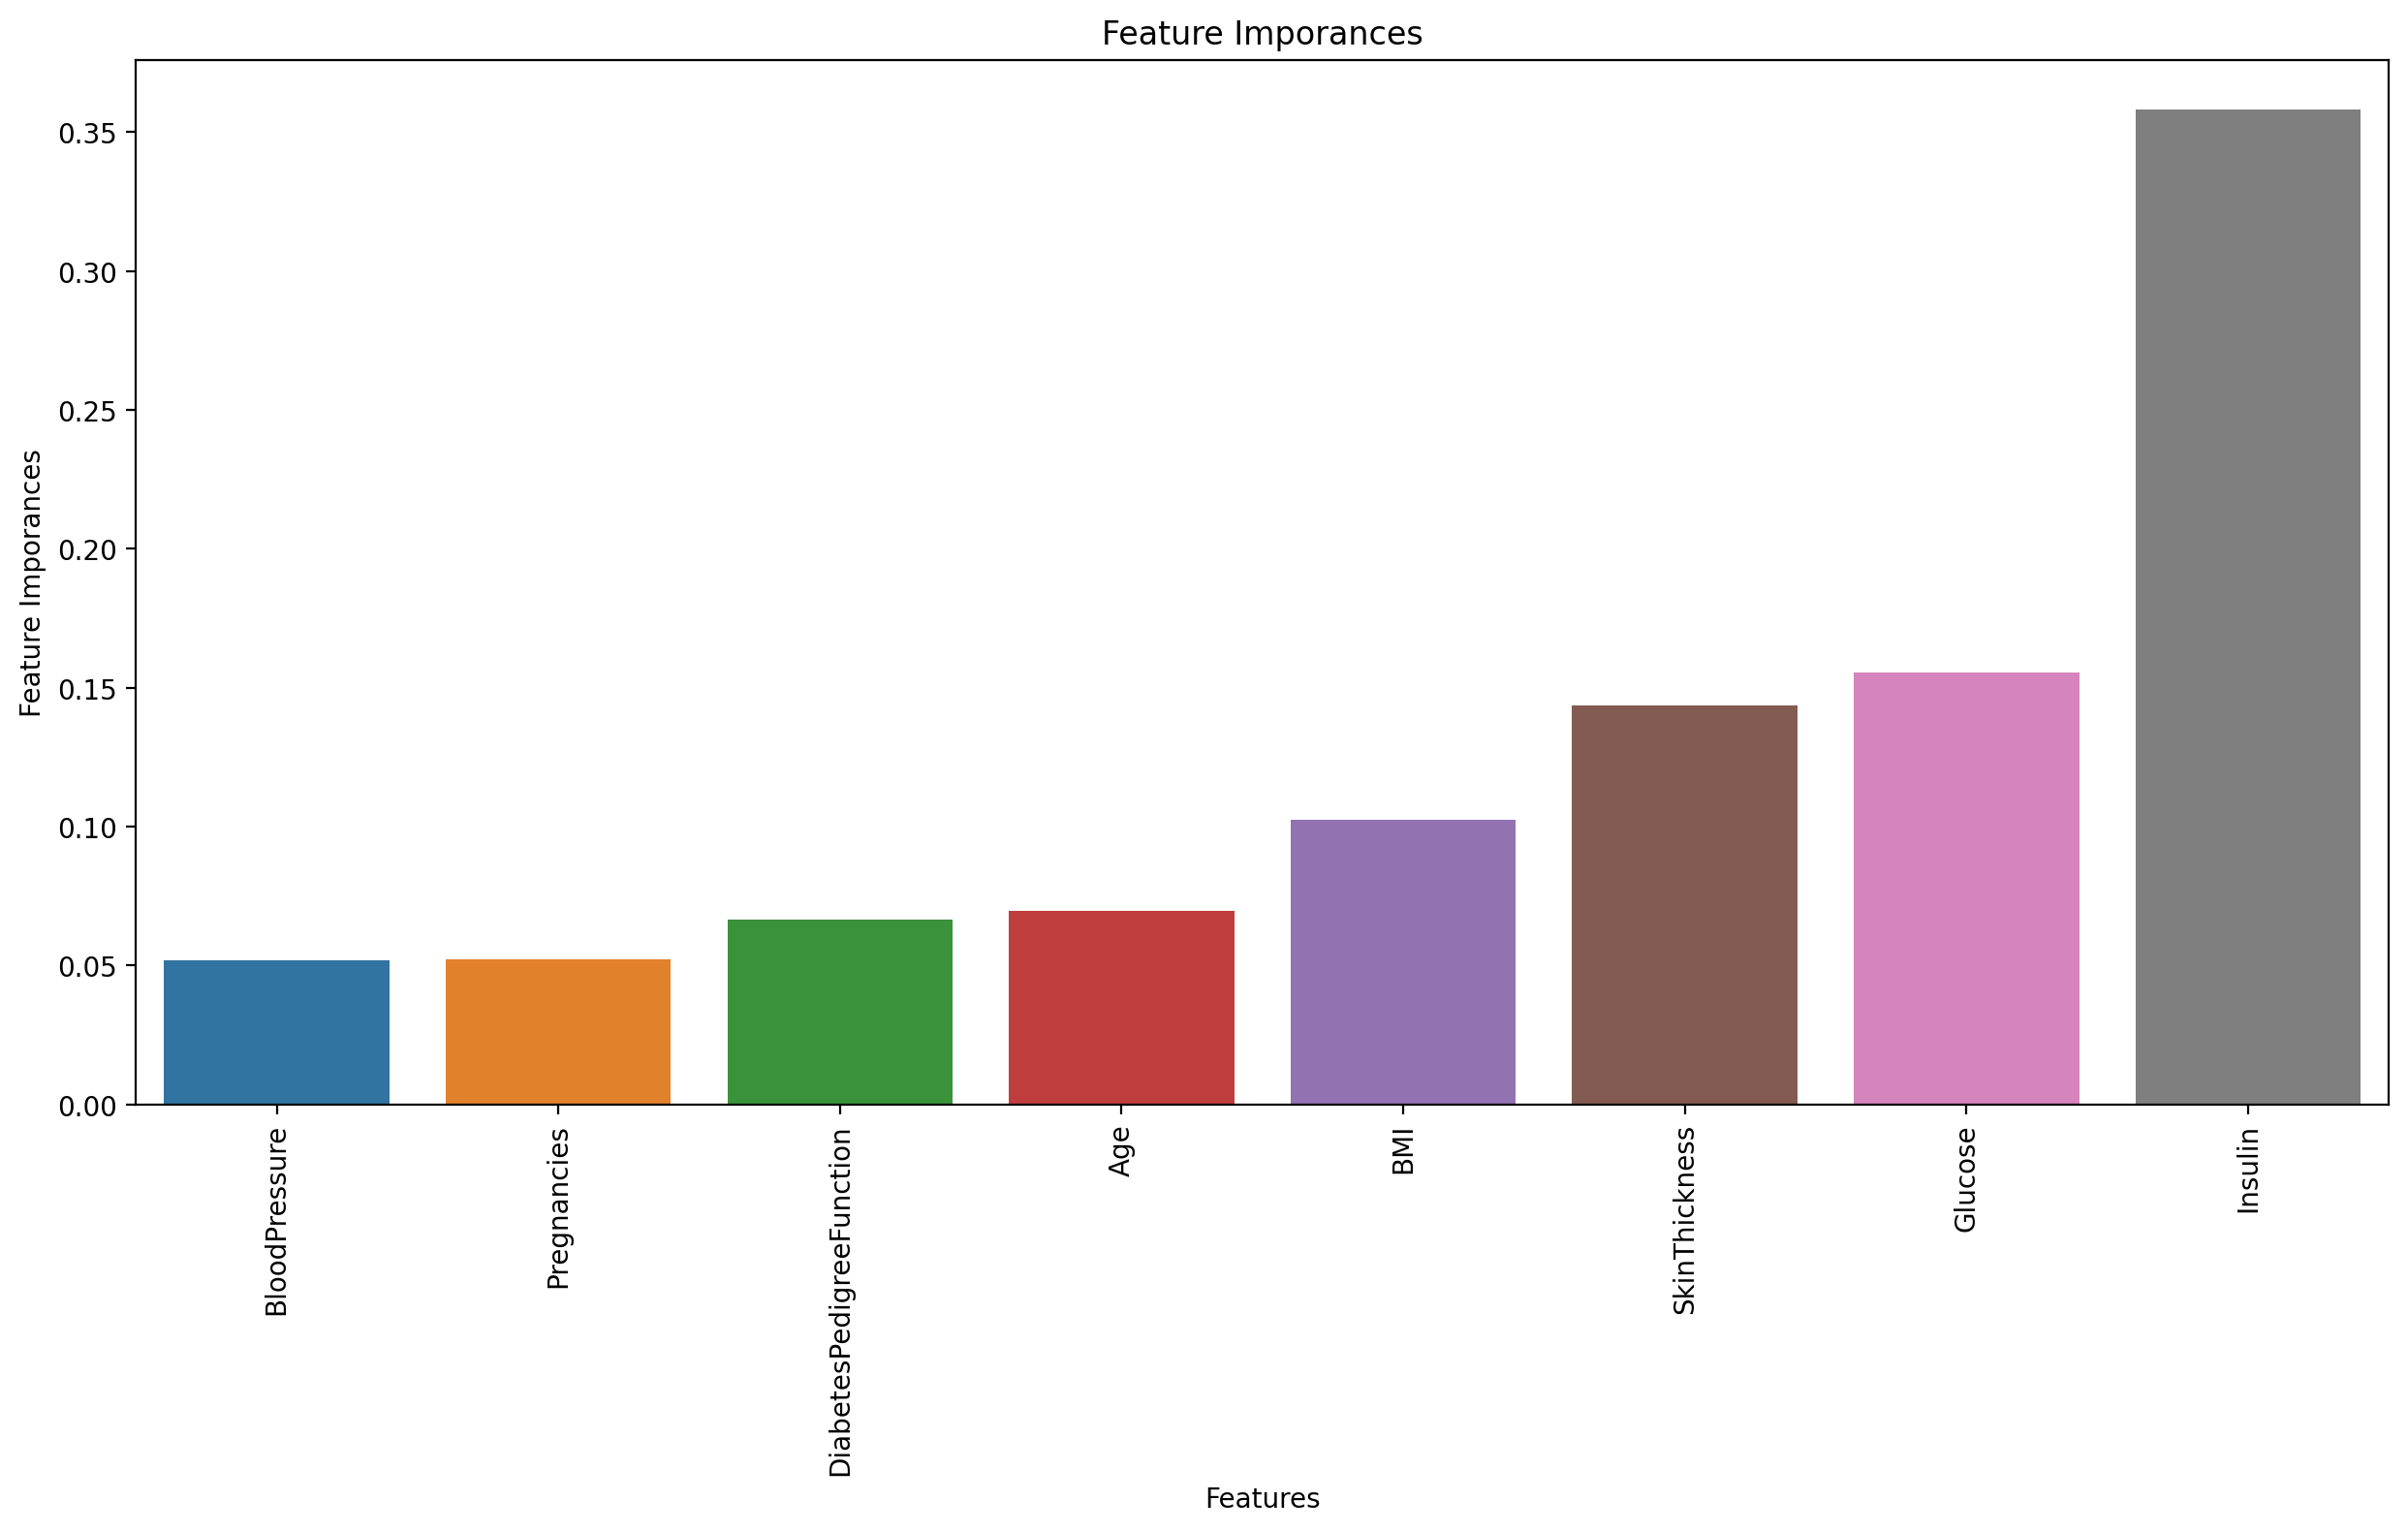

In [103]:
plt.figure(figsize=(15,7),dpi=200)
sns.barplot(data=feature_importances,x="Features",y="Feature Imporances")
plt.title("Feature Imporances")
plt.xticks(rotation=90)
plt.show()

In [104]:
random_forest

RandomForestClassifier()

In [105]:
y_pred = random_forest.predict(X_test)

In [106]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[99,  9],
       [12, 48]], dtype=int64)

In [107]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.875


In [108]:
accuracy_score(y_test,y_pred)

0.875

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       108
           1       0.84      0.80      0.82        60

    accuracy                           0.88       168
   macro avg       0.87      0.86      0.86       168
weighted avg       0.87      0.88      0.87       168



La précision de ce modèle est de 0.89. Cela signifie que 89% des individus prédits comme étant de la classe correspondante le sont effectivement.

# SVM 

In [119]:
from sklearn import svm
x = df.drop("Outcome",axis=1)
y= df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [120]:
# Creating the SVM model.
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [121]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8701298701298701


Ce résultat indique que le modèle a une exactitude (accuracy) de 0.7922077922077922, soit environ 79.22%. 
L'exactitude est une mesure de la proportion de prédictions correctes faites par le modèle parmi toutes les 
prédictions effectuées.

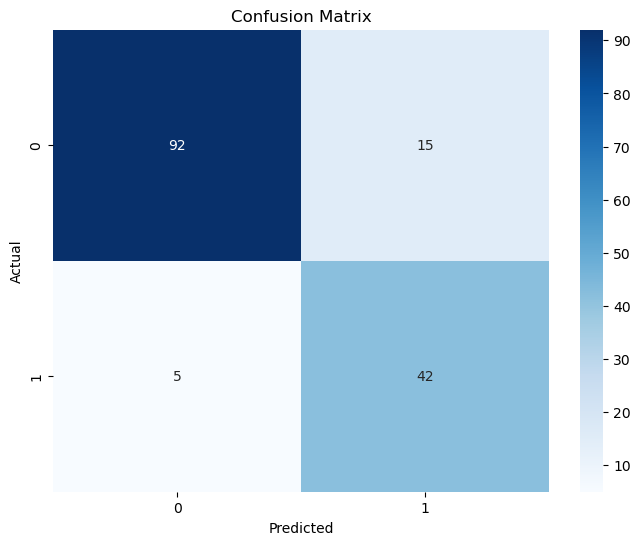

In [122]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Basé sur l'exactitude obtenue, il est raisonnable d'affirmer que le modèle KNN est le meilleur . Avec une précision de 87%, il a correctement prédit environ 87% des étiquettes dans l'ensemble de test, ce qui indique une performance élevée pour cette tâche spécifique de prédiction. 

Accuracy: 0.8701298701298701


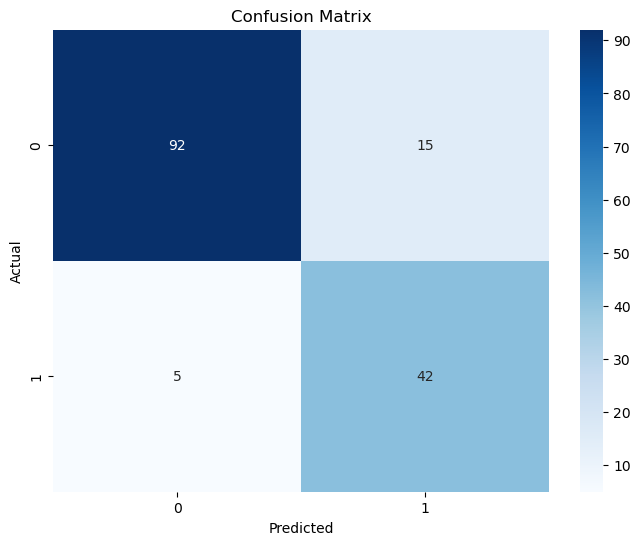

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the SVM model
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [115]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

def get_accuracies_table(df):
    # Splitting the data
    X = df.drop('Outcome', axis=1).values
    y = df['Outcome'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
    
    # KNN
    knn = KNeighborsClassifier(n_neighbors=6)
    knn.fit(X_train, y_train)
    knn_accuracy = knn.score(X_test, y_test)
    
    # Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    nb_accuracy = nb_model.score(X_test, y_test)
    
    # Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    logreg_accuracy = logreg.score(X_test, y_test)
    
    # Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_accuracy = rf_model.score(X_test, y_test)
    
    # SVM
    clf = svm.SVC(kernel='rbf')
    clf.fit(X_train, y_train)
    svm_accuracy = accuracy_score(y_test, clf.predict(X_test))
    
    # Create a DataFrame to display accuracies
    accuracies_df = pd.DataFrame({
        'Model': ['KNN', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'SVM'],
        'Accuracy': [knn_accuracy, nb_accuracy, logreg_accuracy, rf_accuracy, svm_accuracy]
    })
    
    # Find the model with the highest accuracy
    best_model = accuracies_df.loc[accuracies_df['Accuracy'].idxmax()]
    
    return accuracies_df, best_model

# Utilisation de la fonction
accuracies_table, best_model = get_accuracies_table(df)
print("Accuracies Table:")
print(accuracies_table)
print("\nBest Model:")
print(best_model)


Accuracies Table:
                 Model  Accuracy
0                  KNN  0.870130
1          Naive Bayes  0.740260
2  Logistic Regression  0.756494
3        Random Forest  0.870130
4                  SVM  0.824675

Best Model:
Model           KNN
Accuracy    0.87013
Name: 0, dtype: object


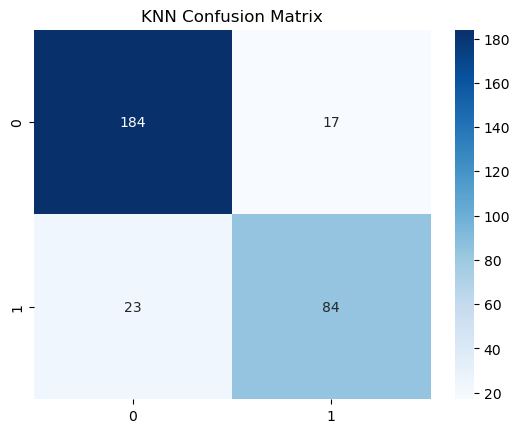

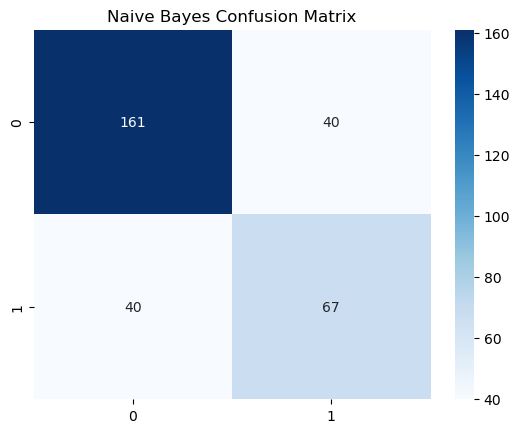

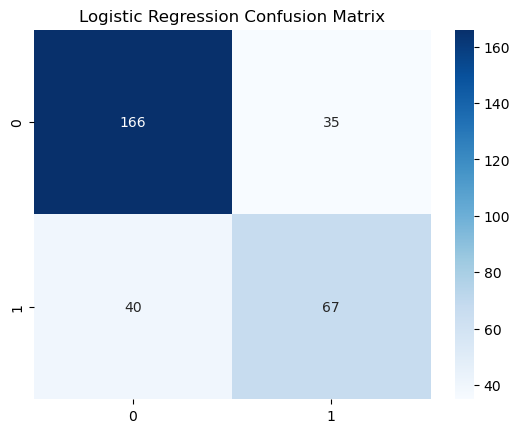

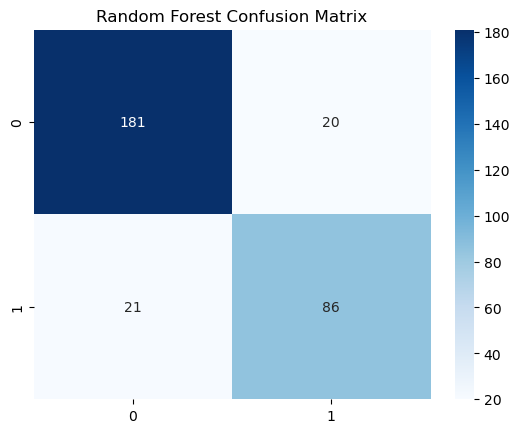

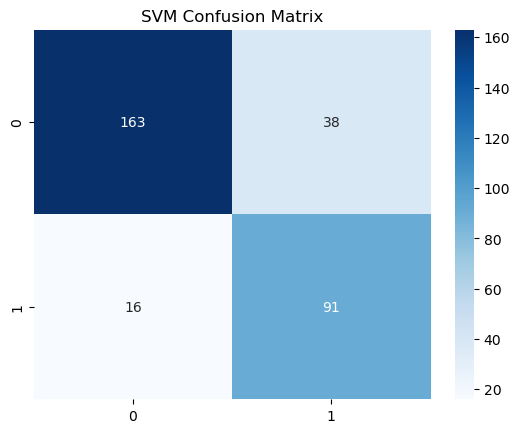

Accuracies:
{'KNN': 0.8701298701298701, 'Naive Bayes': 0.7402597402597403, 'Logistic Regression': 0.7564935064935064, 'Random Forest': 0.8668831168831169, 'SVM': 0.8246753246753247}

Best Model: KNN


In [56]:

def get_accuracies_and_confusion_matrices(df):
    # Splitting the data
    X = df.drop('Outcome', axis=1).values
    y = df['Outcome'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
    
    # KNN
    knn = KNeighborsClassifier(n_neighbors=6)
    knn.fit(X_train, y_train)
    knn_accuracy = knn.score(X_test, y_test)
    knn_confusion_matrix = confusion_matrix(y_test, knn.predict(X_test))
    knn_accuracy_plot = sns.heatmap(knn_confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("KNN Confusion Matrix")
    plt.show()
    
    # Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    nb_accuracy = nb_model.score(X_test, y_test)
    nb_confusion_matrix = confusion_matrix(y_test, nb_model.predict(X_test))
    nb_accuracy_plot = sns.heatmap(nb_confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Naive Bayes Confusion Matrix")
    plt.show()
    
    # Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    logreg_accuracy = logreg.score(X_test, y_test)
    logreg_confusion_matrix = confusion_matrix(y_test, logreg.predict(X_test))
    logreg_accuracy_plot = sns.heatmap(logreg_confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Logistic Regression Confusion Matrix")
    plt.show()
    
    # Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_accuracy = rf_model.score(X_test, y_test)
    rf_confusion_matrix = confusion_matrix(y_test, rf_model.predict(X_test))
    rf_accuracy_plot = sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Random Forest Confusion Matrix")
    plt.show()
    
    # SVM
    clf = svm.SVC(kernel='rbf')
    clf.fit(X_train, y_train)
    svm_accuracy = accuracy_score(y_test, clf.predict(X_test))
    svm_confusion_matrix = confusion_matrix(y_test, clf.predict(X_test))
    svm_accuracy_plot = sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("SVM Confusion Matrix")
    plt.show()
    
    accuracies = {
        'KNN': knn_accuracy,
        'Naive Bayes': nb_accuracy,
        'Logistic Regression': logreg_accuracy,
        'Random Forest': rf_accuracy,
        'SVM': svm_accuracy
    }
    
    best_model = max(accuracies, key=accuracies.get)
    
    return accuracies, best_model

# Utilisation de la fonction
accuracies, best_model = get_accuracies_and_confusion_matrices(df)
print("Accuracies:")
print(accuracies)
print("\nBest Model:", best_model)


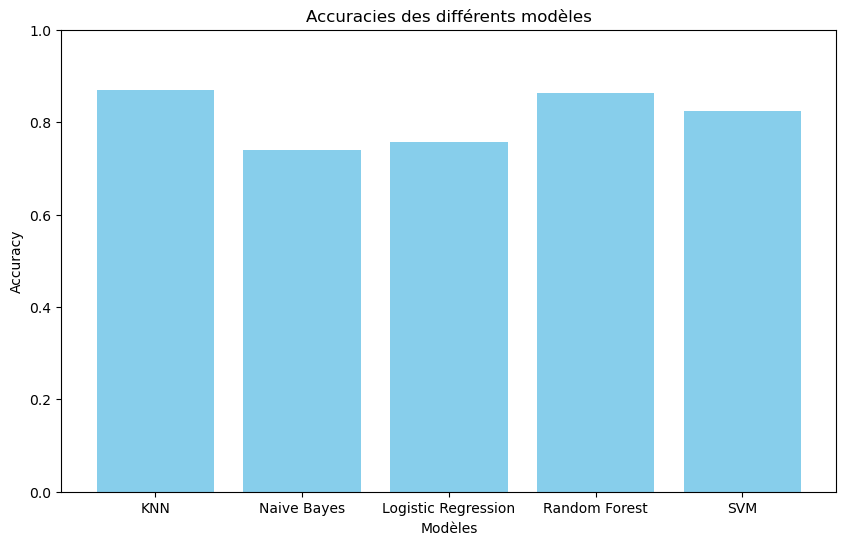

In [60]:
import matplotlib.pyplot as plt

# Accuracies des différents modèles
models = list(accuracies.keys())
accuracies_values = list(accuracies.values())

# Création du diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies_values, color='skyblue')
plt.xlabel('Modèles')
plt.ylabel('Accuracy')
plt.title('Accuracies des différents modèles')
plt.ylim(0, 1)  # Définit l'échelle de l'axe y de 0 à 1 pour représenter les accuracies
plt.show()

 Nous avons utilisé l'exactitude (accuracy) dans notre cas car elle représente la proportion de prédictions correctes parmi l'ensemble des prédictions. Dans le contexte de notre problème, où nous essayons de prédire si un patient est diabétique ou non, l'exactitude est une mesure intuitive et facilement interprétable. Cependant, nous aurions également pu considérer d'autres métriques telles que le rappel (recall) ou le score F1, qui sont plus appropriés lorsque les faux positifs et les faux négatifs ont des implications différentes. L'utilisation d'une combinaison de ces métriques aurait pu être envisagée pour évaluer plus exhaustivement la performance des algorithmes et leur capacité à généraliser à de nouveaux cas.